In [14]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
from scipy.stats import sem
from sklearn import datasets
import seaborn as sn
import statsmodels.api as sm
from config import api_key
import numpy as np
import matplotlib.cm as cm

ModuleNotFoundError: No module named 'config'

In [7]:
# import csv files
csvfile19 = "./Resources/2019.csv"
csv_df19 = pd.read_csv(csvfile19)
csv_df19["Year"] = "2019"

csvfile18 = "./Resources/2018.csv"
csv_df18 = pd.read_csv(csvfile18)
csv_df18["Year"] = "2018"

csvfile17 = "./Resources/2017.csv"
csv_df17 = pd.read_csv(csvfile17)
csv_df17["Year"] = "2017"

csvfile16 = "./Resources/2016.csv"
csv_df16 = pd.read_csv(csvfile16)
csv_df16["Year"] = "2016"

csvfile15 = "./Resources/2015.csv"
csv_df15 = pd.read_csv(csvfile15)
csv_df15["Year"] = "2015"

In [8]:
#merged indiv file years 2015-2019 together

combined_df = csv_df19.append(csv_df18)
combined_df = combined_df.append(csv_df17)
combined_df = combined_df.append(csv_df16)
combined_df = combined_df.append(csv_df15)

#drop index column that was created when files were merged
combined_df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
#import csv from api data

playercsv = "./Resources/player_data.csv"
player_df = pd.read_csv(playercsv)
merged_df = pd.merge(combined_df, player_df, left_on = "Player", right_on = "Name", how="left")
merged_df.drop(columns=["G", "GS", "Att", "Yds", "Att.1", "Yds.1", "Yds.2", "Name", "Salary"], inplace=True)
merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.rename(columns={
    "Tm": "Team",
    "Cmp": "Completions",
    "Int": "Interceptions",
    "Tgt": "Targets",
    "Y/R": "YdsPerRec",
    "Rec": "Receptions",
    "Year": "FantasyYear"
}, inplace=True)

In [10]:
csvfileMP = "./Resources/MergedPlayers.csv"
merged_df = pd.read_csv(csvfileMP)

## There are several different positions that contribute to scoring in Fantasy Football. The project limited the scope to the top 4 scoring positions: Quarterback, Running Back, Wide Receiver, and Tight End. The goal for any fantasy team is to score the most points as possible. Analyzing the data, certain positions definitely score more points than others. 

## Over the past 5 seasons(excluding 2020), Quarterbacks consistently score the most points compared to the other positions. Quarterbacks score over 2x more points than the lowest position, Tight Ends, from year to year. Typically, fantasy teams only have one Quarterback slot to fill. Because the average quarterback  scores such a high amount, most drafters generally wait to draft a Quarterback in the later rounds, prioritizing other positions first.

## Wide Receivers score the next most fantasy points, slightly edging out Running Backs. In 2015, there was a wider gap between Wide Receivers and Running Backs, but over the years, the gap has pretty much disappeared. When drafting between the two positions, the data suggests that they will put up the same amount of points, so it would be best to take the best player available regardless of if they are a Running Back or Wide Receiver.

## The position that scores the least amount of points is the Tight End position. There is approximately a 25 point difference between Tight End fantasy scoring and Wide Receivers/ Running Backs. Tight Ends are not a good position to focus on. The other positions will typically yield more points, so when drafting, filling out the WR/RB/QB positions before filling out the TE position will build a stronger team.



In [11]:
#Create list of csvfiles
season = [csv_df15, csv_df16, csv_df17, csv_df18, csv_df19]

#Empty lists to store points per position
QB_points = []

#Reads csvfile for years 2015-2019, locates Quarterbacks and appends Quarterback Fantasy Points average per season to list removing null values
for year in season:
    response = year.loc[(year['Pos'] == "QB")]
    QB_df = response.loc[(response['FantasyPoints'] > 0)]
    QB_mean = QB_df['FantasyPoints'].mean()
    QB_points.append(QB_mean)

#Reads csvfile for years 2015-2019, locates Wide Receivers and appends Wide Receiver Fantasy Points average per season to list removing null values
WR_points = []

for year in season:
    response = year.loc[(year['Pos'] == "WR")]
    WR_df = response.loc[(response['FantasyPoints'] > 0)]
    WR_mean = WR_df['FantasyPoints'].mean()
    WR_points.append(WR_mean)
    
#Reads csvfile for years 2015-2019, locates Running Backs and appends Running Back Fantasy Points average per season to list removing null values
RB_points = []

for year in season:
    response = year.loc[(year['Pos'] == "RB")]
    RB_df = response.loc[(response['FantasyPoints'] > 0)]
    RB_mean = RB_df['FantasyPoints'].mean()
    RB_points.append(RB_mean)

#Reads csvfile for years 2015-2019, locates Tight Ends and appends Tight Fantasy Points average per season to list removing null values
TE_points = []

for year in season:
    response = year.loc[(year['Pos'] == "TE")]
    TE_df = response.loc[(response['FantasyPoints'] > 0)]
    TE_mean = TE_df['FantasyPoints'].mean()
    TE_points.append(TE_mean)

In [12]:
#Time variable to cycle through years
time = np.arange(2015,2020,1)

#Plot lines per position, looking at year and fantasy points average
QBs, = plt.plot(time, QB_points, color = "green", label = "Quarterbacks")
RBs, = plt.plot(time, RB_points, color = "purple", label = "Running Backs")
WRs, = plt.plot(time, WR_points, color = "red", label = "Wide Receivers")
TEs, = plt.plot(time, TE_points, color = "gold", label = "Tight Ends")
plt.title("Average Fantasy Points per Season")
plt.xlabel("Season")
plt.ylabel("Fantasy Points")
plt.xlim(2015,2019)
plt.ylim(30,185)
plt.legend(handles=[QBs, RBs, WRs, TEs], loc="upper right")
plt.grid()

#Save graph as png
plt.savefig('./Images/positionpts.png')
plt.figure(figsize = (50,30))
plt.show()
plt.close()

NameError: name 'np' is not defined

## Do some teams yield better fantasy scorers? The bubble chart shows the average fantasy point scoring by team, the standard deviation of the fantasy points, and the total sum of fantasy points. Though there are some difference in the total amount of fantasy points scored by team, it is not a very big difference.

## The Atlanta Falcons score the most total fantasy points. They also score the highest average fantasy points and have the greatest standard deviation in points. The Falcons are a high scoring offense. They have a high scoring QB, two high scoring WR, and a high scoring RB looking at historical data. Because the have a handful of elite players, and the football is also distributed to other players who score a lower amount of points, this disparity is shown by the standard deviation.

## The Los Angeles Chargers score the least total fantasy points. The team moved from San Diego for the 2018 season, so there are only two season worth of data for that team. However, during that time, with an above average QB, a high scoring RB, and gifted WR, the have the second highest average fantasy points. This team also has the second highest standard deviation. The Chargers are focused on a handful of gifted players and their other offensive members do not see the ball as often.

## At the very bottom of the chart are the Buffalo Bills. From 2015-2019, they had the lowest average scoring offense. Not very much higher, the next worst average scoring team are the New York Jets. These teams do not put up that many fantasy points and with a low scoring offense, are typically avoided in drafts.

## The Detroit Lions have the lowest standard deviation of all NFL teams. They spread the ball around to many different players, and their average fantasy points are on the lower end of the chart. The players on the Detroit Lions do not present a high ceiling in terms of fantasy points. In fantasy football, the more focus on a player, the more fantasy points they can score. Since the Detroit Lions don't have a major focus on their offense, they average less fantasy scoring.

In [3]:
#Set plot size
plt.figure(figsize = (35,25))

#Put all NFL teams in a list

Teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU','IND',
        'JAX','KC','MIA','MIN','NE','NO','NYG','NYJ','LV','PHI','PIT','LAC','SF','SEA',
        'LAR','SD','TB','TEN','WAS']
counter = 0

#Variable for unique rainbow colors       
colors = iter(cm.rainbow(np.linspace(0, 1, len(Teams))))

#Create bubble chart of NFL teams, their average fantasy points, standard deviation with the bubble size by the total fantasy points.
for team in Teams:
    plt.scatter(merged_df.loc[merged_df["Team"]==Teams[counter]].groupby("Team")["FantasyPoints"].std(),\
                merged_df.loc[merged_df["Team"]==Teams[counter]].groupby("Team")["FantasyPoints"].mean(),\
                s=merged_df.loc[merged_df["Team"]==Teams[counter]].groupby("Team")["FantasyPoints"].sum()*2,\
                marker="o",alpha=.5, color=next(colors), label=Teams[counter])
    counter +=1

# Label axes, set title, show grid lines
plt.title("NFL Team Fantasy Points and Variation", size =50)
plt.ylabel("Average Team Fantasy Points", size =35)
plt.xlabel("Standard Deviation of Team Fantasy Points", size = 35)
plt.grid(True)


Numbers = np.arange(0,33,1)

# Create a legend
lgnd = plt.legend(loc= "lower right", scatterpoints = 1, fontsize = 20, title="Teams")

# Makes dots in legend all the same size
for number in Numbers:
    lgnd.legendHandles[number]._sizes = [500]

#Saves the chart
plt.savefig('./Images/fantasybubble.png')

NameError: name 'plt' is not defined

## JR

In [9]:
sorted_df = merged_df.sort_values("FantasyPoints", ascending = False)

indexPositions = sorted_df[sorted_df["Position"] == "0"].index
sorted_df.drop(indexPositions , inplace=True)

In [10]:
#combine height in feet with height in inches to create total height in inches

sorted_df["Height_ft_in"] = sorted_df["HeightFeet"] * 12
sorted_df["Height_Total"] = sorted_df["Height_ft_in"] + sorted_df["HeightInches"]

In [11]:
x = sorted_df["Age"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              2554.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                        0.00
Time:                        09:47:45   Log-Likelihood:                         -16370.
No. Observations:                2792   AIC:                                  3.274e+04
Df Residuals:                    2791   BIC:                                  3.275e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            3.0841      0.061     50.541      0.000       2.964       3.204
==============================================================================
Omnibus:                      504.100   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.700
Skew:                           1.233   Prob(JB):                    2.75e-178
Kurtosis:                       3.972   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x = sorted_df["Weight"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              1833.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                   1.41e-284
Time:                        09:47:45   Log-Likelihood:                         -11843.
No. Observations:                1994   AIC:                                  2.369e+04
Df Residuals:                    1993   BIC:                                  2.369e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3978      0.009     42.815      0.000       0.380       0.416
==============================================================================
Omnibus:                      261.069   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.787
Skew:                           1.043   Prob(JB):                     3.05e-81
Kurtosis:                       3.330   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
x = sorted_df["Height_Total"]
y = sorted_df["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              1953.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                   6.77e-298
Time:                        09:47:45   Log-Likelihood:                         -11812.
No. Observations:                1994   AIC:                                  2.363e+04
Df Residuals:                    1993   BIC:                                  2.363e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.2186      0.028     44.189      0.000       1.165       1.273
==============================================================================
Omnibus:                      279.166   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.904
Skew:                           1.084   Prob(JB):                     1.19e-88
Kurtosis:                       3.415   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
positionPoints_df = sorted_df.groupby("Position")["FantasyPoints"].mean()

In [15]:
qb_data = sorted_df.loc[sorted_df["Position"] == "QB"]

In [16]:
x = qb_data["Age"]
y = qb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.494
Method:                 Least Squares   F-statistic:                              360.7
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    1.64e-56
Time:                        09:47:45   Log-Likelihood:                         -2277.3
No. Observations:                 368   AIC:                                      4557.
Df Residuals:                     367   BIC:                                      4560.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            4.0307      0.212     18.993      0.000       3.613       4.448
==============================================================================
Omnibus:                       88.633   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.561
Skew:                           0.559   Prob(JB):                     3.13e-08
Kurtosis:                       1.998   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x = qb_data["Weight"]
y = qb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.571
Method:                 Least Squares   F-statistic:                              374.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    1.47e-53
Time:                        09:47:45   Log-Likelihood:                         -1745.8
No. Observations:                 281   AIC:                                      3494.
Df Residuals:                     280   BIC:                                      3497.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.6233      0.032     19.354      0.000       0.560       0.687
==============================================================================
Omnibus:                      496.564   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.209
Skew:                           0.251   Prob(JB):                     5.53e-06
Kurtosis:                       1.652   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x = qb_data["Height_Total"]
y = qb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.571
Method:                 Least Squares   F-statistic:                              375.8
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    1.14e-53
Time:                        09:47:45   Log-Likelihood:                         -1745.6
No. Observations:                 281   AIC:                                      3493.
Df Residuals:                     280   BIC:                                      3497.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.8579      0.096     19.384      0.000       1.669       2.047
==============================================================================
Omnibus:                      471.363   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.164
Skew:                           0.255   Prob(JB):                     5.66e-06
Kurtosis:                       1.657   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
rb_data = sorted_df.loc[sorted_df["Position"] == "RB"]

In [20]:
x = rb_data["Age"]
y = rb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.443
Method:                 Least Squares   F-statistic:                              648.0
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                   1.49e-105
Time:                        09:47:45   Log-Likelihood:                         -4752.1
No. Observations:                 813   AIC:                                      9506.
Df Residuals:                     812   BIC:                                      9511.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            2.9056      0.114     25.456      0.000       2.682       3.130
==============================================================================
Omnibus:                      199.597   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.520
Skew:                           1.409   Prob(JB):                     2.14e-86
Kurtosis:                       4.925   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x = rb_data["Weight"]
y = rb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              499.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    2.50e-79
Time:                        09:47:45   Log-Likelihood:                         -3256.0
No. Observations:                 554   AIC:                                      6514.
Df Residuals:                     553   BIC:                                      6518.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3769      0.017     22.352      0.000       0.344       0.410
==============================================================================
Omnibus:                      111.785   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.589
Skew:                           1.238   Prob(JB):                     3.04e-41
Kurtosis:                       4.398   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
x = rb_data["Height_Total"]
y = rb_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              516.5
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    3.03e-81
Time:                        09:47:45   Log-Likelihood:                         -3251.6
No. Observations:                 554   AIC:                                      6505.
Df Residuals:                     553   BIC:                                      6510.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.1649      0.051     22.727      0.000       1.064       1.266
==============================================================================
Omnibus:                      117.799   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.768
Skew:                           1.280   Prob(JB):                     9.32e-45
Kurtosis:                       4.495   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
wr_data = sorted_df.loc[sorted_df["Position"] == "WR"]

In [24]:
x = wr_data["Age"]
y = wr_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.534
Model:                            OLS   Adj. R-squared (uncentered):              0.533
Method:                 Least Squares   F-statistic:                              1198.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                   1.43e-175
Time:                        09:47:45   Log-Likelihood:                         -6089.3
No. Observations:                1047   AIC:                                  1.218e+04
Df Residuals:                    1046   BIC:                                  1.219e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            3.3592      0.097     34.613      0.000       3.169       3.550
==============================================================================
Omnibus:                      140.400   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.582
Skew:                           1.045   Prob(JB):                     1.25e-43
Kurtosis:                       3.400   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x = wr_data["Weight"]
y = wr_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.543
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              862.3
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                   1.52e-125
Time:                        09:47:45   Log-Likelihood:                         -4271.4
No. Observations:                 727   AIC:                                      8545.
Df Residuals:                     726   BIC:                                      8549.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.4631      0.016     29.365      0.000       0.432       0.494
==============================================================================
Omnibus:                       71.306   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.801
Skew:                           0.870   Prob(JB):                     1.16e-20
Kurtosis:                       2.940   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
x = wr_data["Height_Total"]
y = wr_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              870.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                   2.57e-126
Time:                        09:47:45   Log-Likelihood:                         -4269.7
No. Observations:                 727   AIC:                                      8541.
Df Residuals:                     726   BIC:                                      8546.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     1.2952      0.044     29.498      0.000       1.209       1.381
==============================================================================
Omnibus:                       75.674   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.978
Skew:                           0.904   Prob(JB):                     3.22e-22
Kurtosis:                       2.987   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
te_data = sorted_df.loc[sorted_df["Position"] == "TE"]

In [28]:
x = te_data["Age"]
y = te_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              553.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    9.61e-86
Time:                        09:47:45   Log-Likelihood:                         -3077.4
No. Observations:                 564   AIC:                                      6157.
Df Residuals:                     563   BIC:                                      6161.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            2.1101      0.090     23.525      0.000       1.934       2.286
==============================================================================
Omnibus:                      152.410   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.037
Skew:                           1.512   Prob(JB):                     3.51e-67
Kurtosis:                       4.969   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x = te_data["Weight"]
y = te_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              402.5
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    1.03e-63
Time:                        09:47:46   Log-Likelihood:                         -2383.9
No. Observations:                 432   AIC:                                      4770.
Df Residuals:                     431   BIC:                                      4774.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.2309      0.012     20.063      0.000       0.208       0.254
==============================================================================
Omnibus:                      107.025   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.117
Skew:                           1.431   Prob(JB):                     1.16e-42
Kurtosis:                       4.594   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x = te_data["Height_Total"]
y = te_data["FantasyPoints"]
model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          FantasyPoints   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              402.5
Date:                Thu, 18 Feb 2021   Prob (F-statistic):                    1.03e-63
Time:                        09:47:46   Log-Likelihood:                         -2383.9
No. Observations:                 432   AIC:                                      4770.
Df Residuals:                     431   BIC:                                      4774.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height_Total     0.7608      0.038     20.063      0.000       0.686       0.835
==============================================================================
Omnibus:                      109.223   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.719
Skew:                           1.450   Prob(JB):                     4.28e-44
Kurtosis:                       4.637   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
top60 = sorted_df.head(60)
corr_df = top60[["Position", "Age", "Weight", "Height_Total", "FantasyPoints"]]

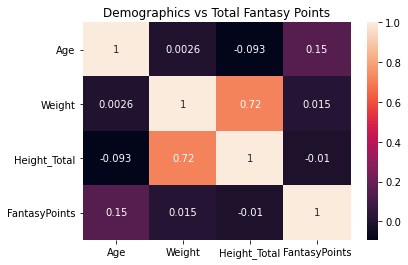

In [32]:
corrMatrix = sorted_df[["Age", "Weight", "Height_Total", "FantasyPoints"]].loc[sorted_df["Position"] == "WR"].corr()
sn.heatmap(corrMatrix, annot=True).set_title("Demographics vs Total Fantasy Points")
plt.show()

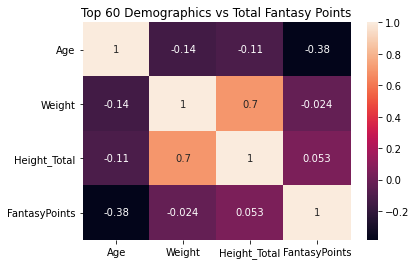

In [33]:
corrMatrix = top60[["Age", "Weight", "Height_Total", "FantasyPoints"]].loc[sorted_df["Position"] == "QB"].corr()
sn.heatmap(corrMatrix, annot=True).set_title("Top 60 Demographics vs Total Fantasy Points")
plt.show()

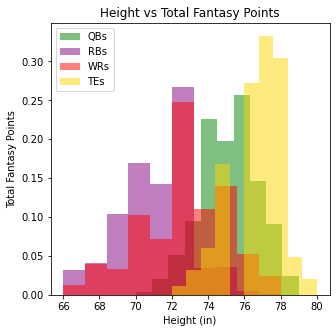

In [34]:
qb_heights = qb_data["Height_Total"]
rb_heights = rb_data["Height_Total"]
wr_heights = wr_data["Height_Total"]
te_heights = te_data["Height_Total"]

plt.figure(figsize=(5,5))
plt.title("Height vs Total Fantasy Points")
plt.xlabel("Height (in)")
plt.ylabel("Total Fantasy Points")
plt.hist(qb_heights, density=True, alpha = 0.5, color="green", label="QBs")
plt.hist(rb_heights, density=True, alpha = 0.5,  color="purple", label="RBs")
plt.hist(wr_heights, density=True, alpha = 0.5, color="red", label="WRs")
plt.hist(te_heights, density=True, alpha = 0.5, color="gold", label="TEs")
plt.legend()

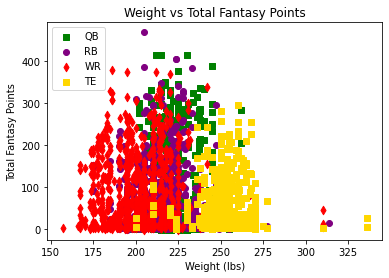

In [35]:
x = range(150,350)
y = range(0,400)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(qb_data["Weight"], qb_data["FantasyPoints"], c = "green", marker="s", label="QB")
ax1.scatter(rb_data["Weight"],rb_data["FantasyPoints"], c = "purple", marker="o", label="RB")
ax1.scatter(wr_data["Weight"], wr_data["FantasyPoints"], c = "red", marker="d", label="WR")
ax1.scatter(te_data["Weight"],te_data["FantasyPoints"], c = "gold", marker="s", label="TE")

plt.legend(loc='upper left');
plt.title("Weight vs Total Fantasy Points")
plt.xlabel("Weight (lbs)")
plt.ylabel("Total Fantasy Points")
plt.show()

In [36]:
qb_age = qb_data["Age"]
rb_age = rb_data["Age"]
wr_age = wr_data["Age"]
te_age = te_data["Age"]

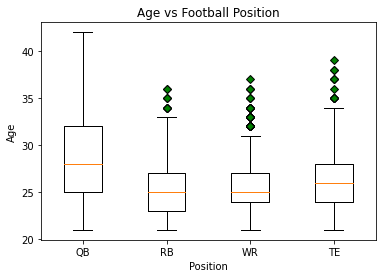

In [37]:
green_diamond = dict(markerfacecolor='g', marker='D')
plots = [qb_age, rb_age, wr_age, te_age]
labels = ["QB", "RB", "WR", "TE"]
fig1, ax1 = plt.subplots()
ax1.set_title("Age vs Football Position")
ax1.set_ylabel("Age")
ax1.set_xlabel("Position")
ax1.boxplot(plots, labels=labels, flierprops=green_diamond)
plt.show()
                                                                             

In [38]:
qb_group = top60.loc[top60["Position"] == "QB"]
rb_group = top60.loc[top60["Position"] == "RB"]
wr_group = top60.loc[top60["Position"] == "WR"]
te_group = top60.loc[top60["Position"] == "TE"]

In [39]:
qb_age_group = qb_group["Age"]
rb_age_group = rb_group["Age"]
wr_age_group = wr_group["Age"]
te_age_group = te_group["Age"]

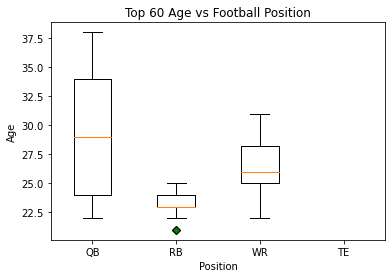

In [40]:
green_diamond = dict(markerfacecolor='g', marker='D')
plots = [qb_age_group, rb_age_group, wr_age_group, te_age_group]
labels = ["QB", "RB", "WR", "TE"]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 60 Age vs Football Position")
ax1.set_ylabel("Age")
ax1.set_xlabel("Position")
ax1.boxplot(plots, labels=labels, flierprops=green_diamond)
plt.show()

## Tiffany

In [41]:
bins = [0,5,10,15,20,25]
group_names = ['0-5 yrs', '5-10 yrs', '10-15 yrs', '15-20 yrs', '20-25 yrs']
merged_df["Exper_Bins"] = pd.cut(merged_df["Experience"], bins, labels=group_names, include_lowest=True)

In [43]:
qb_data = merged_df.loc[merged_df['Position']=='QB']
rb_data = merged_df.loc[merged_df['Position']=='RB']
wr_data = merged_df.loc[merged_df['Position']=='WR']
te_data = merged_df.loc[merged_df['Position']=='TE']

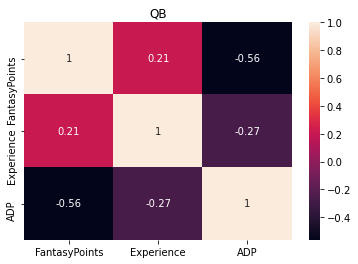

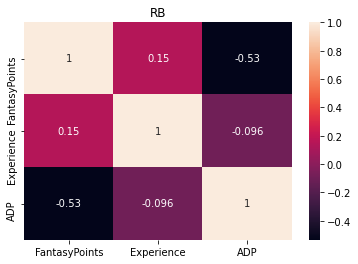

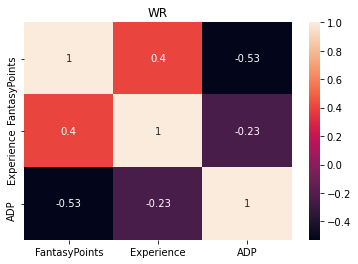

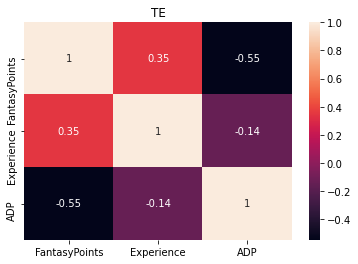

In [44]:
corrMatrix = qb_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("QB")
plt.savefig('./Images/CorrMat_QB.png')
plt.show()

corrMatrix = rb_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("RB")
plt.savefig('./Images/CorrMat_RB.png')
plt.show()

corrMatrix = wr_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("WR")
plt.savefig('./Images/CorrMat_WR.png')
plt.show()

corrMatrix = te_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("TE")
plt.savefig('./Images/CorrMat_TE.png')
plt.show()


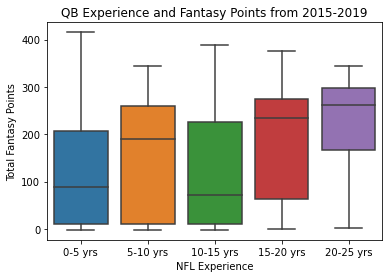

The p value from the ANOVA test comparing Experience to Fantasy Points for the quarter back position is 0.0015238308466153973.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,252.000000,252.000000,252.000000
mean,10.781746,446.082540,142.022460
std,5.394772,342.453867,120.715284
min,3.000000,16.400000,-2.300000
25%,7.000000,145.800000,16.210000
50%,10.000000,485.200000,132.960000
75%,14.250000,611.375000,256.605000
max,24.000000,1808.800000,415.680000


In [45]:
qb = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=qb_data.dropna()).set_title('QB Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_QB.png')
plt.show()
group1 = qb_data[qb_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = qb_data[qb_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = qb_data[qb_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = qb_data[qb_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
group5 = qb_data[qb_data["Exper_Bins"] == "20-25 yrs"]["FantasyPoints"].dropna()
qb = sts.f_oneway(group1, group2, group3, group4, group5)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the quarter back position is {qb[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
qb_data[['Experience','ADP','FantasyPoints']].dropna().describe()

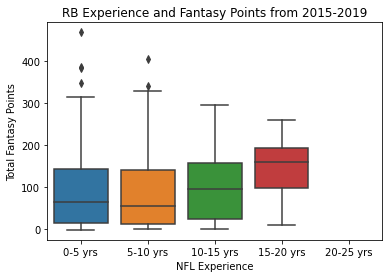

The p value from the ANOVA test comparing Experience to Fantasy Points for the running back position is 0.14530633668951118.
This tells us there could be a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,421.000000,421.000000,421.000000
mean,7.211401,428.957007,90.745653
std,3.054343,395.384999,88.167095
min,1.000000,1.700000,-2.000000
25%,5.000000,157.600000,14.100000
50%,7.000000,304.000000,68.400000
75%,9.000000,589.600000,145.200000
max,18.000000,2019.900000,469.200000


In [46]:
rb = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=rb_data.dropna()).set_title('RB Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_RB.png')
plt.show()
group1 = rb_data[rb_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = rb_data[rb_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = rb_data[rb_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = rb_data[rb_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
rb = sts.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the running back position is {rb[1]}.')
print(f'This tells us there could be a relationship between Experience and Fantasy Points.')
rb_data[['Experience','ADP','FantasyPoints']].dropna().describe()

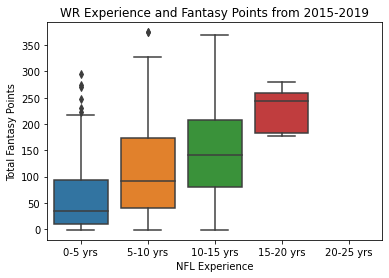

The p value from the ANOVA test comparing Experience to Fantasy Points for the wide receiver position is 1.016888960141898e-24.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,588.000000,588.000000,588.000000
mean,7.399660,476.594728,98.109116
std,3.104396,428.235265,86.170850
min,1.000000,10.100000,-1.500000
25%,5.000000,151.275000,23.425000
50%,8.000000,315.400000,71.650000
75%,9.000000,816.700000,157.175000
max,19.000000,2011.800000,374.600000


In [47]:
wr = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=wr_data.dropna()).set_title('WR Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_WR.png')
plt.show()
group1 = wr_data[wr_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = wr_data[wr_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = wr_data[wr_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = wr_data[wr_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
wr = sts.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the wide receiver position is {wr[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
wr_data[['Experience','ADP','FantasyPoints']].dropna().describe()

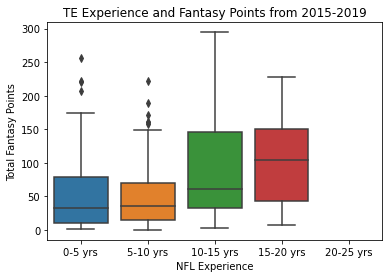

The p value from the ANOVA test comparing Experience to Fantasy Points for the tight end position is 1.5732895768458249e-12.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,358.000000,358.000000,358.000000
mean,8.013966,536.116760,62.869274
std,3.349372,303.356988,61.840922
min,3.000000,25.200000,-0.200000
25%,5.000000,385.400000,15.650000
50%,8.000000,515.000000,39.950000
75%,11.000000,656.050000,92.450000
max,19.000000,2021.000000,294.600000


In [48]:
te = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=te_data.dropna()).set_title('TE Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_TE.png')
plt.show()
group1 = te_data[te_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = te_data[te_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = te_data[te_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = te_data[te_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
te = sts.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the tight end position is {te[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
te_data[['Experience','ADP','FantasyPoints']].dropna().describe()

## Tom

In [49]:
# Assemble new dataframes of runningbacks / Set Index to Positions / Set by year 

#2019
skill_data_19 = csv_df19.set_index(["Pos"]).drop(['QB','0','WR','TE'])

# 2018
skill_data_18 = csv_df18.set_index(["Pos"]).drop(['QB','0','WR','TE'])

#2017
skill_data_17 = csv_df17.set_index(["Pos"]).drop(['QB','0','WR','TE'])

#2016
skill_data_16 = csv_df16.set_index(["Pos"]).drop(['QB','0','WR','TE'])

#2015
skill_data_15 = csv_df15.set_index(["Pos"]).drop(['QB','0','WR','TE'])

In [50]:
# find histogram 
# set columns 

fantasypoints_19 = skill_data_19["FantasyPoints"]
fantasypoints_18 = skill_data_18["FantasyPoints"]
fantasypoints_17 = skill_data_17["FantasyPoints"]
fantasypoints_16 = skill_data_16["FantasyPoints"]
fantasypoints_15 = skill_data_15["FantasyPoints"]

recs_15 = skill_data_15["Rec"]
recs_16 = skill_data_16["Rec"]
recs_17 = skill_data_17["Rec"]
recs_18 = skill_data_18["Rec"]
recs_19 = skill_data_19["Rec"]

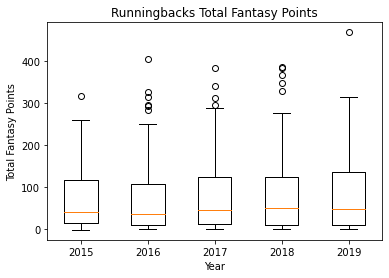

In [51]:
# Plot Box Plot
box_labels = ['2015','2016','2017','2018','2019']
pts_boxes = [fantasypoints_15,fantasypoints_16,fantasypoints_17,fantasypoints_18,fantasypoints_19]
plt.ylabel("Total Fantasy Points")
plt.xlabel("Year")
plt.title("Runningbacks Total Fantasy Points")

plot_1 = plt.boxplot(pts_boxes, labels=box_labels)

plt.show() 

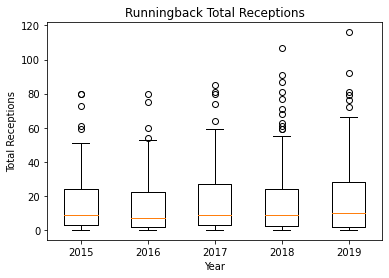

In [52]:
recs_boxes = [recs_15,recs_16,recs_17,recs_18,recs_19]
plt.xlabel("Year")
plt.ylabel("Total Receptions")
plt.title("Runningback Total Receptions")

plot_2 = plt.boxplot(recs_boxes, labels=box_labels)

In [53]:
# Find quartiles
desc_fantpts_19 = skill_data_19.describe()["FantasyPoints"]
desc_fantpts_18 = skill_data_18.describe()["FantasyPoints"]
desc_fantpts_17 = skill_data_17.describe()["FantasyPoints"]
desc_fantpts_16 = skill_data_16.describe()["FantasyPoints"]
desc_fantpts_15 = skill_data_15.describe()["FantasyPoints"]

In [54]:
# Establish top quartile per year
top_q_scorers_15 = skill_data_15[skill_data_15["FantasyPoints"].ge(117)]
top_q_scorers_16 = skill_data_16[skill_data_16["FantasyPoints"].ge(107)]
top_q_scorers_17 = skill_data_17[skill_data_17["FantasyPoints"].ge(123.4)]
top_q_scorers_18 =skill_data_18[skill_data_18["FantasyPoints"].ge(123.8)]
top_q_scorers_19 = skill_data_19[skill_data_19["FantasyPoints"].ge(136.4)]

# Build Columns of Rushing/Receiving Yds per Year, then Put into DF
# 2019
tq_rushyds_19 = top_q_scorers_19["RushingYds"]
tq_recyds_19 = top_q_scorers_19["ReceivingYds"]
tq_totalyds_19 = tq_rushyds_19 + tq_recyds_19

#2018
tq_rushyds_18 = top_q_scorers_18["RushingYds"]
tq_recyds_18 = top_q_scorers_18["ReceivingYds"]
tq_totalyds_18 = tq_rushyds_18 + tq_recyds_18

#2017
tq_rushyds_17 = top_q_scorers_17["RushingYds"]
tq_recyds_17 = top_q_scorers_17["ReceivingYds"]
tq_totalyds_17 = tq_rushyds_17 + tq_recyds_17

#2016
tq_rushyds_16 = top_q_scorers_16["RushingYds"]
tq_recyds_16 = top_q_scorers_16["ReceivingYds"]
tq_totalyds_16 = tq_rushyds_16 + tq_recyds_16

#2015
tq_rushyds_15 = top_q_scorers_15["RushingYds"]
tq_recyds_15 = top_q_scorers_15["ReceivingYds"]
tq_totalyds_15 = tq_rushyds_15 + tq_recyds_15

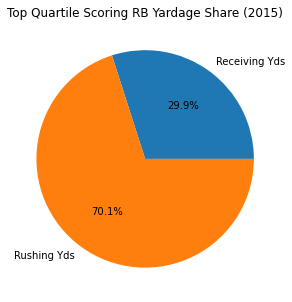

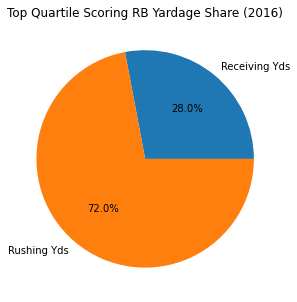

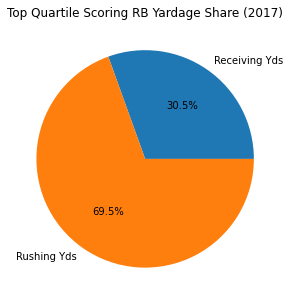

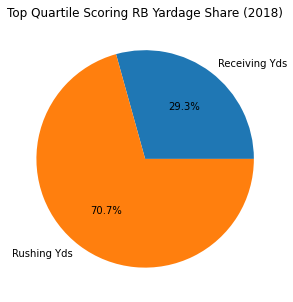

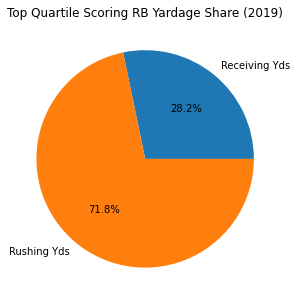

In [55]:
# plot the pie charts -- TOP QUARTILE
labels = ["Receiving Yds","Rushing Yds"]

# 2015
sum_15_rushing = tq_rushyds_15.sum()
sum_15_receiving = tq_recyds_15.sum()
sizes_15 = [sum_15_receiving,sum_15_rushing]
plt.figure(figsize=(5,5))
plt.pie(sizes_15,labels=labels,autopct='%1.1f%%')
plt.title("Top Quartile Scoring RB Yardage Share (2015)")

# 2016
sum_16_rushing = tq_rushyds_16.sum()
sum_16_receiving = tq_recyds_16.sum()
sizes_16 = [sum_16_receiving,sum_16_rushing]
plt.figure(figsize=(5,5))
plt.pie(sizes_16, labels=labels, autopct='%1.1f%%')
plt.title("Top Quartile Scoring RB Yardage Share (2016)")

# 2017 
sum_17_rushing = tq_rushyds_17.sum()
sum_17_receiving = tq_recyds_17.sum()
sizes_17 = [sum_17_receiving,sum_17_rushing]
plt.figure(figsize=(5,5))
plt.pie(sizes_17, labels=labels, autopct='%1.1f%%')
plt.title("Top Quartile Scoring RB Yardage Share (2017)")

# 2018 
sum_18_rushing = tq_rushyds_18.sum()
sum_18_receiving = tq_recyds_18.sum()
sizes_18 = [sum_16_receiving,sum_18_rushing]
plt.figure(figsize=(5,5))
plt.pie(sizes_18, labels=labels, autopct='%1.1f%%')
plt.title("Top Quartile Scoring RB Yardage Share (2018)")

# 2019
sum_19_rushing = tq_rushyds_19.sum()
sum_19_receiving = tq_recyds_19.sum()
sizes_19 = [sum_16_receiving,sum_19_rushing]
plt.figure(figsize=(5,5))
plt.pie(sizes_19, labels=labels, autopct='%1.1f%%')
plt.title("Top Quartile Scoring RB Yardage Share (2019)")
plt.show()

In [56]:
# Full League Split --- Rushing vs. Receiving
labels = ["Receiving Yds", "Rushing Yds"]

# 2015
whole_sum_rush_15 = skill_data_15["RushingYds"].sum()
whole_sum_rec_15 = skill_data_15["ReceivingYds"].sum()
sizes_51 = [whole_sum_rec_15,whole_sum_rush_15]
plt.figure(figsize=(5,5))
plt.pie(sizes_60,labels=labels, autopct = '%1.1f%%')
plt.title("Complete Runningback Yardage Share (2015)")

#2016
whole_sum_rush_16 = skill_data_16["RushingYds"].sum()
whole_sum_rec_16 = skill_data_16["ReceivingYds"].sum()
sizes_61 = [whole_sum_rec_16,whole_sum_rush_16]
plt.figure(figsize=(5,5))
plt.pie(sizes_61,labels=labels, autopct = '%1.1f%%')
plt.title("Complete Runningback Yardage Share (2016)")

#2017
whole_sum_rush_17 = skill_data_17["RushingYds"].sum()
whole_sum_rec_17 = skill_data_17["ReceivingYds"].sum()
sizes_71 = [whole_sum_rec_17,whole_sum_rush_17]
plt.figure(figsize=(5,5))
plt.pie(sizes_71,labels=labels, autopct = '%1.1f%%')
plt.title("Complete Runningback Yardage Share (2017)")

#2018
whole_sum_rush_18 = skill_data_18["RushingYds"].sum()
whole_sum_rec_18 = skill_data_18["ReceivingYds"].sum()
sizes_81 = [whole_sum_rec_18,whole_sum_rush_18]
plt.figure(figsize=(5,5))
plt.pie(sizes_81,labels=labels, autopct = '%1.1f%%')
plt.title("Complete Runningback Yardage Share (2018)")

#2019
whole_sum_rush_19 = skill_data_19["RushingYds"].sum()
whole_sum_rec_19 = skill_data_19["ReceivingYds"].sum()
sizes_91 = [whole_sum_rec_19,whole_sum_rush_19]
plt.figure(figsize=(5,5))
plt.pie(sizes_91,labels=labels, autopct = '%1.1f%%')
plt.title("Complete Runningback Yardage Share (2019)")
plt.show()

NameError: name 'sizes_60' is not defined

<Figure size 360x360 with 0 Axes>

## Prior to our study, we predicted that the top scoring fantasy runningbacks would have more catches and receiving yards than the remainder of the runningback population.

## However, as shown above: The top scoring runningbacks actually derived a smaller share of their total yardage from receiving yards relative to the whole runningback population.

## 2015: Top 25%: 29.9% vs. Complete: 31.0%
## 2016: Top 25%: 28.0% vs. Complete: 30.4%
## 2017: Top 25%: 30.5% vs. Complete 32.1%
## 2018: Top 25%: 29.3% vs. Complete: 31.5%
## 2019: Top 25%: 28.2% vs. Complete 31.0%

In [57]:
# Set up Variables for Mean Testing

# 2015 
tq_rec_15 = top_q_scorers_15["Rec"]
all_rec_15 = skill_data_15["Rec"]
tq_meanrec_15 = top_q_scorers_15["Rec"].mean()
all_meanrec_15 = skill_data_15["Rec"].mean()

# 2016
tq_rec_16 = top_q_scorers_16["Rec"]
all_rec_16 = skill_data_16["Rec"]
tq_meanrec_16 = top_q_scorers_16["Rec"].mean()
all_meanrec_16 = skill_data_16["Rec"].mean()

# 2017
tq_rec_17 = top_q_scorers_17["Rec"]
all_rec_17 = skill_data_17["Rec"]
tq_meanrec_17 = top_q_scorers_17["Rec"].mean()
all_meanrec_17 = skill_data_17["Rec"].mean()

# 2018
tq_rec_18 = top_q_scorers_18["Rec"]
all_rec_18 = skill_data_18["Rec"]
tq_meanrec_18 = top_q_scorers_18["Rec"].mean()
all_meanrec_18 = skill_data_18["Rec"].mean()

# 2019
tq_rec_19 = top_q_scorers_19["Rec"]
all_rec_19 = skill_data_19["Rec"]
tq_meanrec_19 = top_q_scorers_19["Rec"].mean()
all_meanrec_19 = skill_data_19["Rec"].mean()

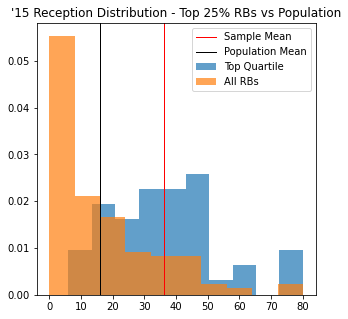

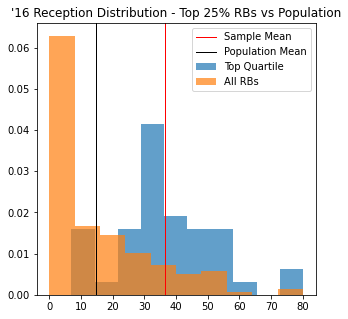

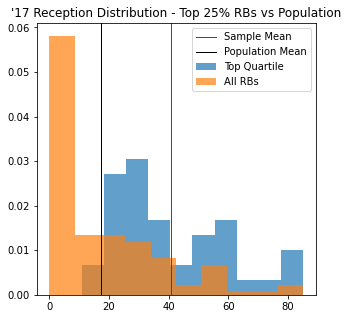

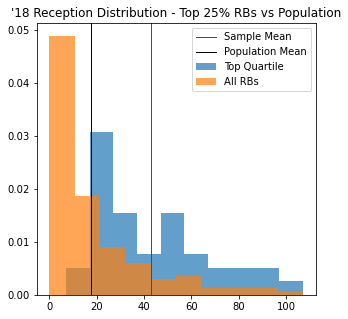

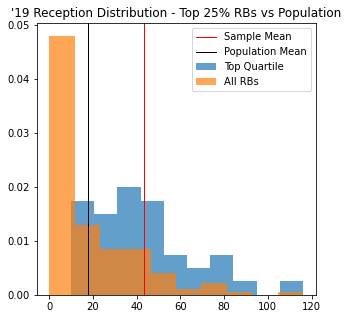

In [58]:
# Plot Histogram/Box of Fantasy Points 

# 2015

plt.figure(figsize=(5,5))
plt.title("'15 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_15, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_15, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_15, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_15, color='black',linewidth = 1, label="Population Mean")
plt.legend()

#2016

plt.figure(figsize=(5,5))
plt.title("'16 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_16, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_16, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_16, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_16, color='black',linewidth = 1, label="Population Mean")
plt.legend()

# 2017

plt.figure(figsize=(5,5))
plt.title("'17 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_17, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_17, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_17, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_17, color='black',linewidth = 1, label="Population Mean")
plt.legend()

#2018

plt.figure(figsize=(5,5))
plt.title("'18 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_18, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_18, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_18, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_18, color='black',linewidth = 1, label="Population Mean")
plt.legend()

# 2019

plt.figure(figsize=(5,5))
plt.title("'19 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_19, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_19, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_19, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_19, color='black',linewidth = 1, label="Population Mean")
plt.legend()


plt.show()